ERROR: Error in eval(expr, envir, enclos): object 'pip' not found


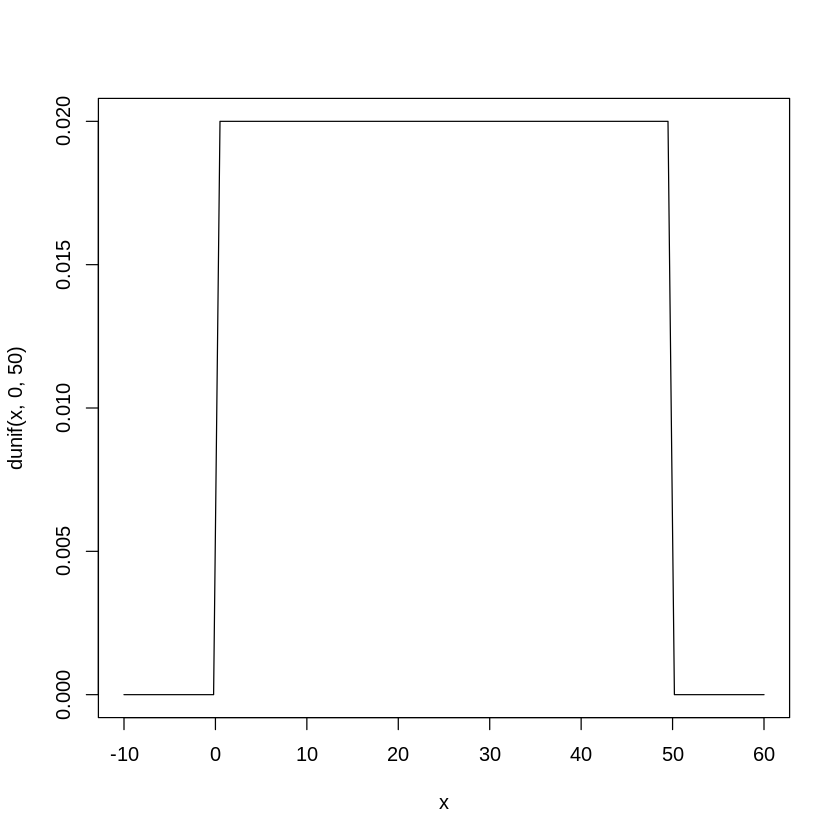

In [16]:
curve(dunif(x,0,50), from = -10, to = 60)

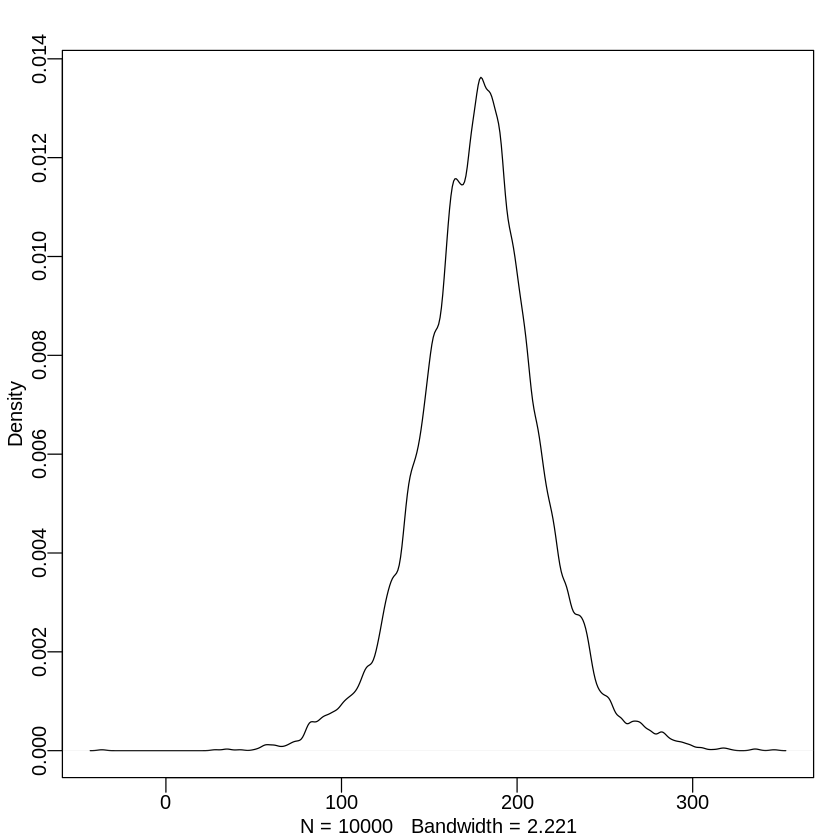

In [18]:
sample_mu <- rnorm(1e4, 178, 20)
sample_sigma <- runif(1e4, 0,50)
prior_h <- rnorm(1e4, sample_mu, sample_sigma)
dens(prior_h)

In [19]:
mu.list <- seq(from = 140, to = 160, length.out = 200)
sigma.list <- seq(from = 4, to = 9, length.out = 200)
post <- expand.grid(mu = mu.list, sigma = sigma.list)
post$LL <- sapply(1:nrow(post), function(i) sum(dnorm(
    d2$height,
    mean = post$mu[i],
    sd = post$sigma[i],
    log = TRUE)))
post$prod <- post$LL + dnorm(post$mu, 178, 20, TRUE) +
                  dunif(post$sigma, 0, 50, TRUE)
post$prob <- exp(post$prod - max(post$prod))   

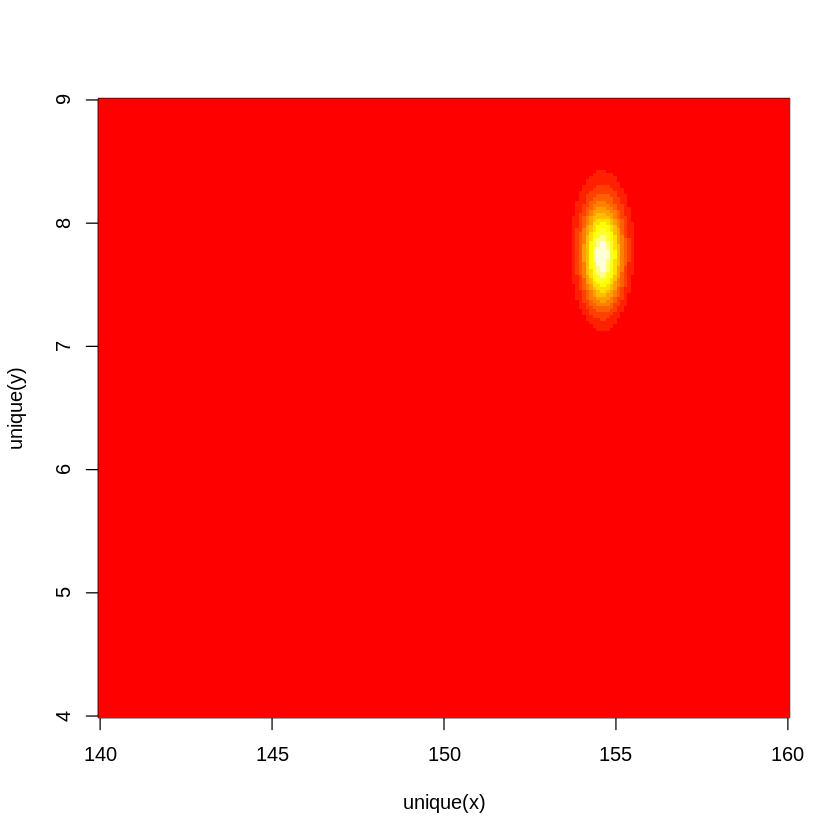

In [22]:
image_xyz(post$mu, post$sigma, post$prob)